#Proyek Analisis Data [Input Datasheet]
**Nama:** [Nadirahmita Adhani]

**ID Kegiatan:** [7469916]

**Kelompok:** [ML-02]




#Menentukan Pertanyaan Bisnis


1.   Bagaimana hubungan antara kondisi cuaca dengan jumlah rental sepeda?
2.   Apakah kondisi cuaca berpengaruh pada penggunaan rental sepeda pada saat workingday?
3.   Korelasi antara Kondisi Berangin dan Jumlah Penggunaan Rental Sepeda?
4.   Berapa hari yang telah berlalu sejak pelanggan terakhir kali melakukan transaksi untuk menyewa sepeda?
5.   Berapa sering pelanggan melakukan transaksi untuk menyewa sepeda?
6.   Total nilai transaksi yang dihasilkan oleh pelanggan?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

## Data Wrangling

### Gathering Data

In [ ]:
day_dataFrame = pd.read_csv("https://raw.githubusercontent.com/MitaAdhani/day-datasheet/main/day.csv")
day_dataFrame.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_dataFrame = pd.read_csv("https://raw.githubusercontent.com/MitaAdhani/day-datasheet/main/hour.csv")
hour_dataFrame.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
day_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_dataFrame.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", day_dataFrame.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_dataFrame.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_dataFrame.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ",hour_dataFrame.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
hour_dataFrame.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


###Cleaning Data
Tidak perlu melakukan karena data sudah bersih dan tidak ada duplikasi

In [ ]:
day_dataFrame.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", day_dataFrame.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
hour_dataFrame.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", hour_dataFrame.duplicated().sum())

Jumlah duplikasi:  0


###Exploratory Data Analysis

In [ ]:
bike_dataFrame = hour_dataFrame.merge(day_dataFrame, on='dteday', how='inner', suffixes=('_hour', '_day'))
bike_dataFrame.head()
bike_dataFrame.to_csv("Bike_data.csv", index=False)

Dari kode diatas, saya menggabungkan dua file sekaligus agar kode yang ditampilkan nanti tidak terlalu panjang

In [ ]:
weather_labels = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rainfall',
    4: 'Heavy Rainfall'
}

bike_dataFrame['weather_label'] = bike_dataFrame['weathersit_day'].map(weather_labels)

Di sini saya menambah keterangan untuk setiap label angka pada cuaca

In [ ]:
bike_dataFrame.describe(include="all")

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,weather_label
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11040
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,NaN
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947,NaN
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,NaN
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,NaN
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,NaN


Berdasarkan kode diatas saya mencoba untuk menampilkan seluruh isi file yang sudah saya gabungkan

In [ ]:
bike_dataFrame.groupby('weather_label')['cnt_day'].mean().reset_index().sort_values("cnt_day")

,weather_label,cnt_day
1,Light Rainfall,1914.700855
2,Mist,4062.717595
0,Clear,4895.177083


Kode diatas menmpilkan jumlah penyewa rental sepeda di setiap cuaca

In [ ]:
bike_dataFrame.groupby('hr')['cnt_hour'].mean().reset_index()

,hr,cnt_hour
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


Kode diatas menampilkan jumlah penyewa sepeda di setiap jam dalam sehari

In [ ]:
bike_dataFrame.groupby('workingday_day')['cnt_day'].mean().reset_index().sort_values(by="cnt_day")

,workingday_day,cnt_day
0,0,4341.834059
1,1,4622.855204


Kode diatas menmpilkan jumlah penyewa sepeda di hari kerja

In [ ]:
bike_dataFrame.groupby('weekday_hour')['cnt_day'].mean().reset_index().sort_values(by="cnt_day")

,weekday_hour,cnt_day
0,0,4239.505995
1,1,4391.920936
6,6,4561.544188
2,2,4566.708113
3,3,4574.609293
5,5,4700.838359
4,4,4703.503440


Kode diatas menampilkan jumlah penyewa sepeda di akhir pekan

In [ ]:
bike_dataFrame.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values("cnt_day")

,holiday_day,cnt_day
1,1,3750.060000
0,0,4556.906215


Kode diatas menampilkan jumlah penyewa sepeda pada saat liburan

In [ ]:
bike_dataFrame.registered_day.sum()

63943480

Kode diatas menampilkan jumlah pemyewa yang sudah terdaftar di rental sepeda.

In [ ]:
bike_dataFrame.casual_day.sum()

14847570

Dari data jumlah penyewa yang telah ditampilkan diatas dapat diketahui registered user punya pengaruh besar dalam penyewaan sepeda di rental sepeda.

Kode diatas menampilkan jumlah penyewa biasa

### Visualization & Explanatory Analysis

### Pertanyaan 1


1.   Bagaimana hubungan antara kondisi cuaca dengan jumlah rental sepeda




<ipython-input-24-0c41f8d768c3>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weather_label', y='cnt_day', data=bike_dataFrame, ci=None)


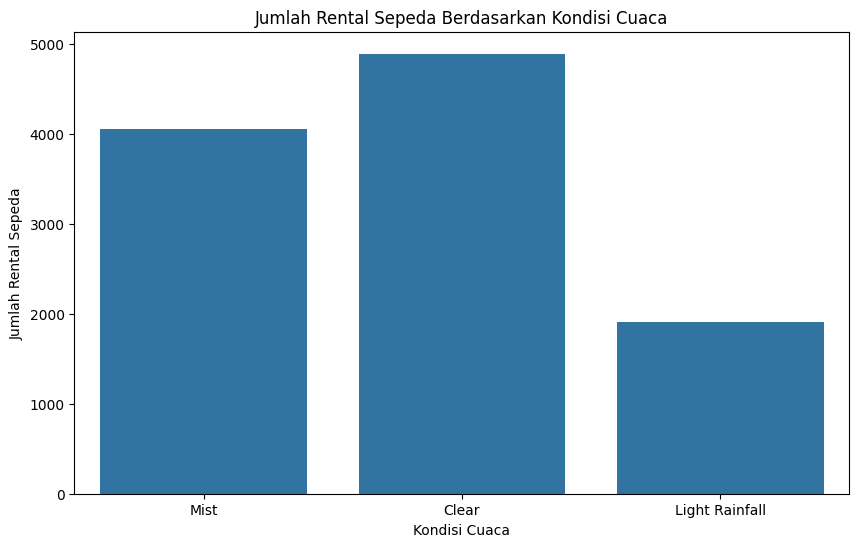

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_label', y='cnt_day', data=bike_dataFrame, ci=None)

# Add title and labels
plt.title('Jumlah Rental Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Rental Sepeda')

# Show the plot
plt.show()

### Pertanyaan 2
2. Apakah kondisi cuaca berpengaruh pada penggunaan rental sepeda pada saat workingday

<ipython-input-25-25d36c72cd5a>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weather_label', y='cnt_day', hue='workingday_day', data=working_day_df, ci=None)


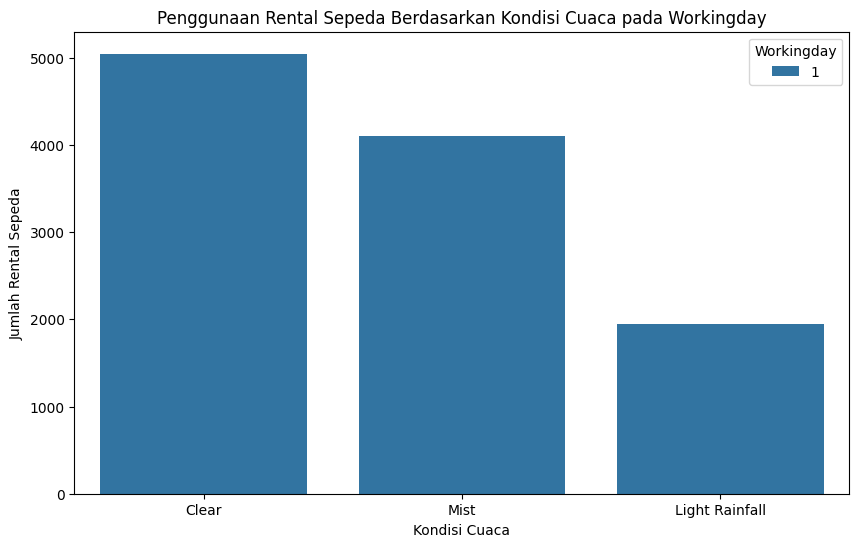

In [ ]:
# Filter the dataframe to only include working days
working_day_df = bike_dataFrame[bike_dataFrame['workingday_day'] == 1]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_label', y='cnt_day', hue='workingday_day', data=working_day_df, ci=None)

# Add title and labels
plt.title('Penggunaan Rental Sepeda Berdasarkan Kondisi Cuaca pada Workingday')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Rental Sepeda')

# Add legend
plt.legend(title='Workingday', loc='upper right')

# Show the plot
plt.show()

### Pertanyaan 3
3. Korelasi antara Kondisi Berangin dan Jumlah Penggunaan Rental Sepeda

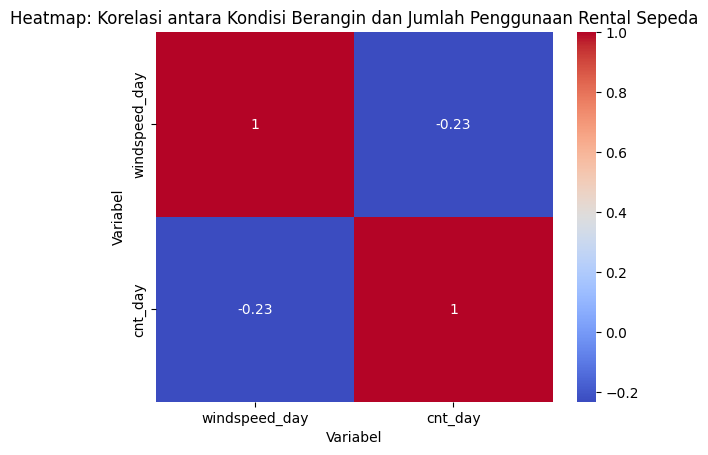

In [ ]:
correlation = bike_dataFrame[['windspeed_day', 'cnt_day']].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap: Korelasi antara Kondisi Berangin dan Jumlah Penggunaan Rental Sepeda')
plt.xlabel('Variabel')
plt.ylabel('Variabel')
plt.show()

### Pertanyaan RFM
4.   Berapa hari yang telah berlalu sejak pelanggan terakhir kali melakukan transaksi untuk menyewa sepeda?
5.   Berapa sering pelanggan melakukan transaksi untuk menyewa sepeda?
6.   Total nilai transaksi yang dihasilkan oleh pelanggan?


In [ ]:
# Ubah kolom 'dteday' menjadi tipe data datetime
bike_dataFrame['dteday'] = pd.to_datetime(bike_dataFrame['dteday'])

# Menghitung Recency, Frequency, dan Monetary berdasarkan tanggal transaksi
rfm_df = bike_dataFrame.groupby('dteday').agg({
    'dteday': lambda date: (bike_dataFrame['dteday'].max() - date.max()).days,  # Recency
    'cnt_day': 'count',  # Frequency
    'registered_day': 'sum',  # Monetary dari pelanggan terdaftar
    'casual_day': 'sum'  # Monetary dari pelanggan non-terdaftar
}).rename(columns={
    'dteday': 'Recency',
    'cnt_day': 'Frequency',
    'registered_day': 'Monetary_Registered',
    'casual_day': 'Monetary_Casual'
})

# Menampilkan hasil
print(rfm_df.head())

            Recency  Frequency  Monetary_Registered  Monetary_Casual
dteday                                                              
2011-01-01      730         24                15696             7944
2011-01-02      729         23                15410             3013
2011-01-03      728         22                27038             2640
2011-01-04      727         23                33442             2484
2011-01-05      726         23                34914             1886


<ipython-input-28-f45adb0e547c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Recency", x="dteday", data=rfm_df.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-28-f45adb0e547c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Frequency", x="dteday", data=rfm_df.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-28-f45adb0e547c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Monetary_Registered", x="dteday", data=rfm_df.sort_values(by="Mone

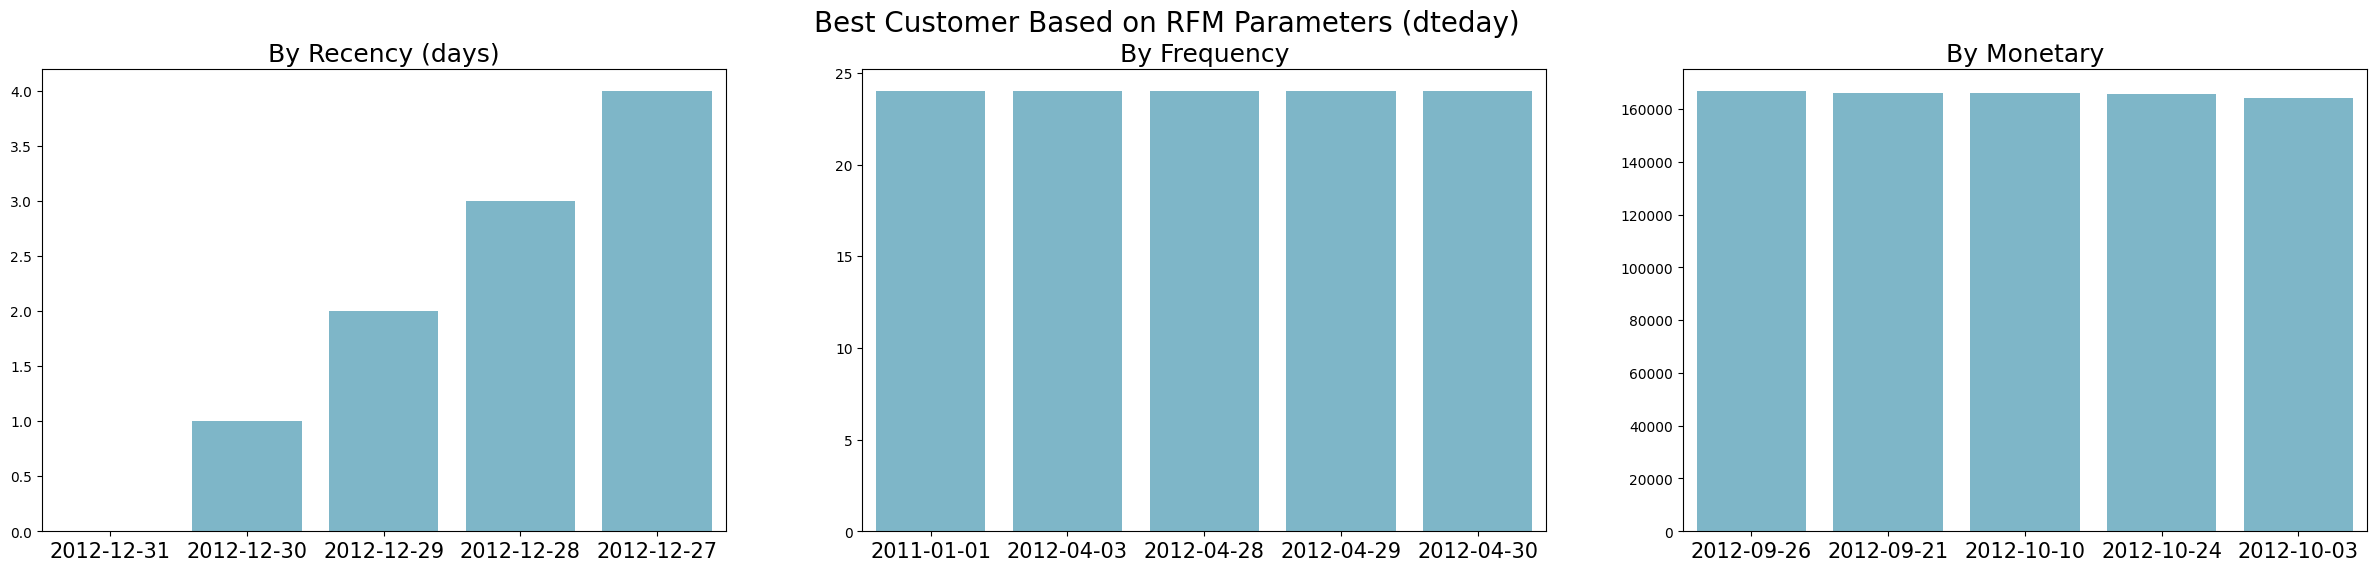

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="Recency", x="dteday", data=rfm_df.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="Frequency", x="dteday", data=rfm_df.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="Monetary_Registered", x="dteday", data=rfm_df.sort_values(by="Monetary_Registered", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (dteday)", fontsize=20)
plt.show()

### Conclusion

Pertanyaan:
1.   Bagaimana hubungan antara kondisi cuaca dengan jumlah rental sepeda

Jawaban:
Seperti yang terlihat pada diagram, para masyarakat cenderung menyewa sepeda dalam keadaan cuaca yang cerah berkisar 4800 penyewa dan paling sedikit sekitar 2000 penyewa pada saat cuaca sedang hujan ringan.

### Conclusion
Pertanyaan:
2. Apakah kondisi cuaca berpengaruh pada penggunaan rental sepeda pada saat workingday

Jawaban:

Seperti yang terlihat pada diagram, jumlah penyewa sepeda pada saat workingday lebih besar di cuaca cerah dengan jumlah sekitar 5000 penyewa dan paling sedikit di cuaca hujan ringan dengan jumlah penyewa berkisar 2000 penyewa. Hal ini dapat disimpulkan bahwa cuaca sangat berpengaruh dalam penyewaan di rental sepeda.

###Conclusion
Pertanyaan:
3. Korelasi antara Kondisi Berangin dan Jumlah Penggunaan Rental Sepeda

Jawaban:
Dari diagram yang ditampilkan dilihat jumlah korelasinya cenderung lemah, berkisar di angka -0.23, untuk lebih jelasnya bisa dilihat pada visual heatmap dengan korelasi "windspeed" dan "cnt". Hal ini menjadikan penyewa sepeda cenderung menurun pada saat kondisi sedang berangin.

In [ ]:
bike_dataFrame.to_csv("Bike_data.csv", index=False)